In [1]:
# script to scrap tweets by a twitter user.
# Author - ThePythonDjango.Com
# dependencies - BeautifulSoup, requests
#username = McDonalds

from bs4 import BeautifulSoup
import requests
import sys
import json



def get_tweet_text(tweet):
    tweet_text_box = tweet.find("p", {"class": "TweetTextSize TweetTextSize--normal js-tweet-text tweet-text"})
    images_in_tweet_tag = tweet_text_box.find_all("a", {"class": "twitter-timeline-link u-hidden"})
    tweet_text = tweet_text_box.text
    for image_in_tweet_tag in images_in_tweet_tag:
        tweet_text = tweet_text.replace(image_in_tweet_tag.text, '')

    return tweet_text

def get_this_page_tweets(soup):
    tweets_list = list()
    tweets = soup.find_all("li", {"data-item-type": "tweet"})
    for tweet in tweets:
        tweet_data = None
        try:
            tweet_data = get_tweet_text(tweet)
        except Exception as e:
            continue
            #ignore if there is any loading or tweet error

        if tweet_data:
            tweets_list.append(tweet_data)
            print(".", end="")
            sys.stdout.flush()

    return tweets_list


def get_tweets_data(username, soup):
    tweets_list = list()
    tweets_list.extend(get_this_page_tweets(soup))

    next_pointer = soup.find("div", {"class": "stream-container"})["data-min-position"]

    while True:
        next_url = "https://twitter.com/i/profiles/show/" + username + \
                   "/timeline/tweets?include_available_features=1&" \
                   "include_entities=1&max_position=" + next_pointer + "&reset_error_state=false"

        next_response = None
        try:
            next_response = requests.get(next_url)
        except Exception as e:
            # in case there is some issue with request. None encountered so far.
            print(e)
            return tweets_list

        tweets_data = next_response.text
        tweets_obj = json.loads(tweets_data)
        if not tweets_obj["has_more_items"] and not tweets_obj["min_position"]:
            # using two checks here bcz in one case has_more_items was false but there were more items
            print("\nNo more tweets returned")
            break
        next_pointer = tweets_obj["min_position"]
        html = tweets_obj["items_html"]
        soup = BeautifulSoup(html, 'lxml')
        tweets_list.extend(get_this_page_tweets(soup))

    return tweets_list


# dump final result in a json file
def dump_data(username, tweets):
    filename = username+"_twitter.json"
    print("\nDumping data in file " + filename)
    data = dict()
    data["tweets"] = tweets
    with open(filename, 'w') as fh:
        fh.write(json.dumps(data))

    return filename




def start(username = None):
    username = input('Enter User Name :')
    url = "http://www.twitter.com/" + username
    print("\n\nDownloading tweets for " + username)
    response = None
    try:
        response = requests.get(url)
    except Exception as e:
        print(repr(e))
        sys.exit(1)
    
    if response.status_code != 200:
        print("Non success status code returned "+str(response.status_code))
        sys.exit(1)

    soup = BeautifulSoup(response.text, 'lxml')

    if soup.find("div", {"class": "errorpage-topbar"}):
        print("\n\n Error: Invalid username.")
        sys.exit(1)

    tweets = get_tweets_data(username, soup)
    # dump data in a text file
    dump_data(username, tweets)
    print(str(len(tweets))+" tweets dumped.")


start()


Enter User Name :McDonalds


.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
No more tweets returned

Dumping data in file McDonalds_twitter.json
821 tweets dumped.


In [2]:
import pandas as pd
import json

In [213]:
#####     ___ Load File which is named as McDonalds_twitter.json and attached with code.

In [69]:
#eading .json file created above
import pandas as pd
data = pd.read_json('McDonalds_twitter.json')   #Load McDonalds_twitter.json 
data

,tweets
0,\n\n\n\n\n\n\n\n\n
1,\n\n\n\n\n\n\n\n\n
2,\n\n\n\n\n\n\n\n\n
3,\n\n\n\n\n\n\n\n\n
4,\n\n\n\n\n\n\n\n\n
...,...
816,Shamrock & Chill. Click for even more ambience...
817,"When life gives you ,\nditch 'em for delicious"
818,"Rob loves basketball, we love Rob's all day lo..."
819,Today we surprised & celebrated local do-goode...


In [70]:
#second files data 

In [72]:
# USERNAME =>>> pizzahut

def get_tweet_text(tweet):
    tweet_text_box = tweet.find("p", {"class": "TweetTextSize TweetTextSize--normal js-tweet-text tweet-text"})
    images_in_tweet_tag = tweet_text_box.find_all("a", {"class": "twitter-timeline-link u-hidden"})
    tweet_text = tweet_text_box.text
    for image_in_tweet_tag in images_in_tweet_tag:
        tweet_text = tweet_text.replace(image_in_tweet_tag.text, '')

    return tweet_text

def get_this_page_tweets(soup):
    tweets_list = list()
    tweets = soup.find_all("li", {"data-item-type": "tweet"})
    for tweet in tweets:
        tweet_data = None
        try:
            tweet_data = get_tweet_text(tweet)
        except Exception as e:
            continue
            #ignore if there is any loading or tweet error

        if tweet_data:
            tweets_list.append(tweet_data)
            print(".", end="")
            sys.stdout.flush()

    return tweets_list


def get_tweets_data(username, soup):
    tweets_list = list()
    tweets_list.extend(get_this_page_tweets(soup))

    next_pointer = soup.find("div", {"class": "stream-container"})["data-min-position"]

    while True:
        next_url = "https://twitter.com/i/profiles/show/" + username + \
                   "/timeline/tweets?include_available_features=1&" \
                   "include_entities=1&max_position=" + next_pointer + "&reset_error_state=false"

        next_response = None
        try:
            next_response = requests.get(next_url)
        except Exception as e:
            # in case there is some issue with request. None encountered so far.
            print(e)
            return tweets_list

        tweets_data = next_response.text
        tweets_obj = json.loads(tweets_data)
        if not tweets_obj["has_more_items"] and not tweets_obj["min_position"]:
            # using two checks here bcz in one case has_more_items was false but there were more items
            print("\nNo more tweets returned")
            break
        next_pointer = tweets_obj["min_position"]
        html = tweets_obj["items_html"]
        soup = BeautifulSoup(html, 'lxml')
        tweets_list.extend(get_this_page_tweets(soup))

    return tweets_list


# dump final result in a json file
def dump_data(username, tweets):
    filename = username+"_twitter.json"
    print("\nDumping data in file " + filename)
    data = dict()
    data["tweets"] = tweets
    with open(filename, 'w') as fh:
        fh.write(json.dumps(data))

    return filename




def start(username = None):
    username = input('Enter User Name :')
    url = "http://www.twitter.com/" + username
    print("\n\nDownloading tweets for " + username)
    response = None
    try:
        response = requests.get(url)
    except Exception as e:
        print(repr(e))
        sys.exit(1)
    
    if response.status_code != 200:
        print("Non success status code returned "+str(response.status_code))
        sys.exit(1)

    soup = BeautifulSoup(response.text, 'lxml')

    if soup.find("div", {"class": "errorpage-topbar"}):
        print("\n\n Error: Invalid username.")
        sys.exit(1)

    tweets = get_tweets_data(username, soup)
    # dump data in a text file
    dump_data(username, tweets)
    print(str(len(tweets))+" tweets dumped.")


start()

Enter User Name :pizzahut


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
No more tweets returned

Dumping data in file pizzahut_twitter.json
788 tweets dumped.


In [ ]:
#####     ___ Load File which is named as pizzahut_twitter.json and attached with code.

In [73]:
data1 = pd.read_json('pizzahut_twitter.json')
data1

,tweets
0,Leave the cooking to us. We're open for contac...
1,Our pizzas cook at 400+ degrees and then slide...
2,"Get the pizza you want, how you want it. Order..."
3,We're open for contactless curbside pickup ava...
4,Add the best picks to your team for the NFL Dr...
...,...
783,Refuel for the big race.
784,"HERSHEY'S chocolate chunks, graham cracker cru..."
785,The proof is in the pizza .
786,Bringing families together since 1958. https:/...


In [74]:
df = data.iloc[:,[0]]
df1 = data1.iloc[:,[0]]

In [75]:
df.head(), df1.head()

(               tweets
 0  \n\n\n\n\n\n\n\n\n
 1  \n\n\n\n\n\n\n\n\n
 2  \n\n\n\n\n\n\n\n\n
 3  \n\n\n\n\n\n\n\n\n
 4  \n\n\n\n\n\n\n\n\n,
                                               tweets
 0  Leave the cooking to us. We're open for contac...
 1  Our pizzas cook at 400+ degrees and then slide...
 2  Get the pizza you want, how you want it. Order...
 3  We're open for contactless curbside pickup ava...
 4  Add the best picks to your team for the NFL Dr...)

In [76]:
dframe = pd.DataFrame()

In [77]:
#creating a new dataframe by combining both the datasets 

In [125]:
dframe['macd'] = df['tweets']
dframe['pizhut'] = df1['tweets']
dframe

,macd,pizhut
0,\n\n\n\n\n\n\n\n\n,Leave the cooking to us. We're open for contac...
1,\n\n\n\n\n\n\n\n\n,Our pizzas cook at 400+ degrees and then slide...
2,\n\n\n\n\n\n\n\n\n,"Get the pizza you want, how you want it. Order..."
3,\n\n\n\n\n\n\n\n\n,We're open for contactless curbside pickup ava...
4,\n\n\n\n\n\n\n\n\n,Add the best picks to your team for the NFL Dr...
...,...,...
816,Shamrock & Chill. Click for even more ambience...,NaN
817,"When life gives you ,\nditch 'em for delicious",NaN
818,"Rob loves basketball, we love Rob's all day lo...",NaN
819,Today we surprised & celebrated local do-goode...,NaN


In [126]:
dframe['macd'][1]

'\n\n\n\n\n\n\n\n\n'

In [127]:
#removing rows with '\n\n\n\n\n\n\n\n\n' as it is for emojis and  has no impact 
dff = dframe[~dframe.macd.str.contains('\n\n\n\n\n\n\n\n\n')]
dff

,macd,pizhut
7,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
14,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
15,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
16,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
17,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
816,Shamrock & Chill. Click for even more ambience...,NaN
817,"When life gives you ,\nditch 'em for delicious",NaN
818,"Rob loves basketball, we love Rob's all day lo...",NaN
819,Today we surprised & celebrated local do-goode...,NaN


In [128]:
#resetting index 
dff.reset_index(inplace=True)
dff.columns

Index(['index', 'macd', 'pizhut'], dtype='object')

In [129]:
#dropping old index column
dff = dff.drop(['index'], axis=1)
dff

,macd,pizhut
0,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
1,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
2,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
3,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
4,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
803,Shamrock & Chill. Click for even more ambience...,NaN
804,"When life gives you ,\nditch 'em for delicious",NaN
805,"Rob loves basketball, we love Rob's all day lo...",NaN
806,Today we surprised & celebrated local do-goode...,NaN


In [130]:
import numpy as np
import nltk

In [212]:
#Downloading popular nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True

In [132]:
#importing required libraries
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random

In [133]:
ps=PorterStemmer()
wordnet=WordNetLemmatizer()
corpus=[]
corpus1 = []

In [134]:
#===data cleaning======
dff['macd'].isnull().sum(axis = 0)
dff.dropna(subset=['macd'],inplace=True)
dff['pizhut'].isnull().sum(axis = 0)
dff.dropna(subset=['pizhut'],inplace=True)
dff.reset_index(inplace = True, drop = True) 
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   macd    775 non-null    object
 1   pizhut  775 non-null    object
dtypes: object(2)
memory usage: 12.2+ KB


In [135]:
#Working on words
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
import nltk
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}

    return tag_dict.get(tag, wn.NOUN)

In [136]:
total_words=[]
total_words1 = []
for i in range(len(dff['macd'])):
    print(i)
    text_for=dff['macd'][i]
    review = re.sub('[^a-zA-Z]',' ',str(text_for))
    review = review.lower()
    #review = review.split()
    all_word=[wordnet.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(review)]
    #print(all_word)
    #review=" ".join(all_word)
    review = [wordnet.lemmatize(word,'v') for word in all_word if not word in stopwords.words('english')]
    #print(review)
    total_words.append(review)
    review1 = ' '.join(review)
    corpus.append(review1)
    
    
    text_for=dff['pizhut'][i]
    review = re.sub('[^a-zA-Z]',' ',str(text_for))
    review = review.lower()
    #review = review.split()
    all_word=[wordnet.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(review)]
    #print(all_word)
    #review=" ".join(all_word)
    review = [wordnet.lemmatize(word,'v') for word in all_word if not word in stopwords.words('english')]
    #print(review)
    total_words1.append(review)
    review2 = ' '.join(review)
    corpus1.append(review2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [137]:
print(len(corpus))
print(type(corpus))
print(len(corpus1))
print(type(corpus1))
print(len(total_words))
print(len(total_words1))

775
<class 'list'>
775
<class 'list'>
775
775


In [138]:
corpus

['serve nearly million thank meal hope serve million let know',
 'friend family community need please help u help frontline worker want give free thank meal know anyone could use one please like tag comment retweet let know truly proud take order',
 'make sure friend right washyourlyrics',
 'magical time year shamrockshakeszn back float enjoy deliciously creamy shamrock shake',
 'back post pic celebrate shamrockshakeszn chance feature fee',
 'call lose hour like call one hour closer best meal day today daylightsavings',
 'fbf time two week ago launch oreo shamrock mcflurry happy birthday oreo nationaloreoday',
 'morning breakfast dream make happy national eggmcmuffinday',
 'good news leapday mean extra morning get breakfast good er news national eggmcmuffinday two day away download app get free egg mcmuffin breakfast',
 'well breakfast free egg mcmuffin breakfast dream come true national eggmcmuffinday get one free app',
 'celebrate year shamrockshakeszn k gold diamond emerald tribute 

In [139]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [140]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(dff['macd'].iloc[10]))
print(dff['macd'].iloc[10])


print(form_sentence(dff['pizhut'].iloc[10]))
print(dff['pizhut'].iloc[10])

Celebrate 50 years of ShamrockShakeSZN with an 18K gold diamond and emerald tribute the Golden Shamrock Shake Bid NOW and it could be yours Proceeds benefit RMHC http mcd.to/60191mJQl
Celebrate 50 years of #ShamrockShakeSZN with an 18K gold, diamond and emerald tribute: the Golden Shamrock Shake. Bid NOW and it could be yours. Proceeds benefit @RMHC! http://mcd.to/60191mJQl 
If a weekend can feel like a weekday then any night can be pizza night Especially if it 's 50 off Online only
If a weekend can feel like a weekday, then any night can be pizza night. Especially if it's 50% off! Online only.


In [141]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess


print(no_user_alpha(form_sentence(dff['macd'].iloc[10])))
print(dff['macd'].iloc[10])

print(no_user_alpha(form_sentence(dff['pizhut'].iloc[10])))
print(dff['pizhut'].iloc[10])

['Celebrate', 'years', 'ShamrockShakeSZN', 'gold', 'diamond', 'emerald', 'tribute', 'Golden', 'Shamrock', 'Shake', 'Bid', 'could', 'Proceeds', 'benefit', 'RMHC', 'http']
Celebrate 50 years of #ShamrockShakeSZN with an 18K gold, diamond and emerald tribute: the Golden Shamrock Shake. Bid NOW and it could be yours. Proceeds benefit @RMHC! http://mcd.to/60191mJQl 
['weekend', 'feel', 'like', 'weekday', 'night', 'pizza', 'night', 'Especially', 'Online']
If a weekend can feel like a weekday, then any night can be pizza night. Especially if it's 50% off! Online only.


In [142]:
#normalization 
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
x = []
y = []
for i in range(len(dff['pizhut'])):
    
    tweet_list = dff['macd'][i].split()
    t = normalization(tweet_list)
    print(t)
    x.append(t)
    tweet_list1 = dff['pizhut'][i].split()
    u = normalization(tweet_list1)
    print(u)
    y.append(u)
    

['We’ve', 'serve', 'nearly', '4', 'Million', 'Thank', 'You', 'Meals.', 'And', 'we', 'only', 'hope', 'to', 'serve', 'millions', 'more.', 'Let', 'them', 'know!']
['Get', 'something', 'for', 'everyone.']
['Friends.', 'Family.', 'Community.', 'WE', 'NEED', 'YOU!', 'Please', 'help', 'us', 'help', 'our', 'frontline', 'workers.', 'We', 'want', 'to', 'give', 'them', 'a', 'FREE', 'thank', 'you', 'meal.', 'If', 'you', 'know', 'anyone', 'who', 'could', 'use', 'one,', 'please', 'like,', 'tag', 'in', 'comment', 'or', 'retweet', 'to', 'let', 'them', 'know.', 'We’d', 'truly', 'be', 'proud', 'to', 'take', 'their', 'order.']
['From', 'our', 'Hut', 'to', 'yours', 'since', '1958.', 'Order', 'now', 'for', 'carryout', 'or', 'contactless', 'delivery.']
['Make', 'sure', 'your', 'friends', 'be', 'do', 'this', 'right...', '#washyourlyrics.']
['Stay', 'home', 'and', 'let', 'us', 'do', 'the', 'cooking.', 'Get', 'a', 'large', 'pizza', 'with', 'up', 'to', 'three', 'toppings', 'for', 'just', '$9.99.', 'Be', 'sure',

['Food', 'for', 'every', 'part', 'of', 'game', 'day.']
['NO', 'PURCH', 'NEC.', 'Ends', '11:59:59', 'p.m.', 'ET', '7/15/18', 'but', 'some', 'trip', 'prize', 'be', 'award', 'earlier.', '50', 'US/DC', '13+.', 'Rules', 'at', 'http://Coke.com/shoutshare']
['#PizzaHutHut']
['You', 'only', 'have', 'TWO', 'DAYS', 'leave', 'to', 'enter', 'for', 'your', 'chance', 'to', 'score', 'an', 'EPIC', 'trip', 'to', 'the', '2018', 'FIFA', 'World', 'Cup™!', 'Run', 'to', 'McDonald’s', 'NOW', 'to', 'Shout', '&', 'Share', 'a', 'Coke', 'in', 'support', 'of', 'your', 'team', 'because', 'June', '14', 'be', 'the', 'LAST', 'DAY', 'you', 'could', 'win!']
['Only', 'clown', 'take', 'and', 'bake.', '#ItChapter2']
['Yes,', 'fry', 'with', 'that.', '#4WordStoryOfMyLife']
['You', 'call', 'it.', 'The', '#HutHutWin', 'Ultimate', 'Fan', 'Prize', 'be', 'a', 'NFL', 'Draft', 'Vegas', 'Trip!', 'See', 'how', 'you', 'could', 'win', 'this', 'and', 'millions', 'of', 'other', 'prize', 'at', 'http://huthutwin.com', '.', '#PizzaHutHut']

['Make', 'sure', 'your', 'start', 'lineup', 'be', 'ready', 'to', 'go', 'for', '#SuperBowlLIII!', '#PizzaHutHut']
['All', 'nighter?', 'All', 'ready', 'with', '#McCafé.']
['Who', 'doesn’t', 'want', 'a', 'slice', 'of', 'this?', 'http://www.pizzahut.com/hutrewards']
['The', 'art', 'of', 'the', 'dip.', '#NationalBBQMonth']
['Oh', 'wait,', 'we', 'can', 'say', 'it', 'now.', 'Who’s', 'ready', 'for', '#SuperBowlLIII?!']
['Opening', 'new', 'doors', 'to', 'flavor.', 'Get', 'free', 'med.', 'Fries', '&', 'soft', 'drink', 'w/', 'purchase', 'of', 'our', 'NEW', 'Signature', 'Crafted', 'Recipes', 'from', '5/4-5/8!']
["Who's", 'ready', 'for', '#TheBigGame?!']
['These', '=', 'national', 'treasure', '(kinda).', 'Celebrate', '#NationalBeverageDay', 'w/a', '$1', 'any', 'size', 'soft', 'drink', 'or', '$2', 'small', 'McCafé', 'frappé,', 'smoothie', 'or', 'shake.']
['Done.']
['“McDonald’s', 'Frork™', 'be', 'in', 'restaurants', 'today!”']
['Sometimes', 'you', 'love', 'something', 'so', 'much', 'that', 'you', 'c

['Stay', 'up', 'latté']
['Extra', 'cup', 'holders', 'be', 'cool.', 'But', 'can', 'your', 'truck', 'make', 'pizza?', 'Introducing', 'the', '@Toyota', 'Tundra', 'PIE', 'Pro:', 'http://bit.ly/2Q4GWPW', '#SEMA2018']
['My', 'secret', 'to', 'Broadway', 'stardom', '-', 'practice', 'in', 'front', 'of', 'my', 'pup', '+', 'enjoy', 'more', '#AllDayBreakfast', 'from', '@McDonalds', '#ad', 'http://bit.ly/TW-DW01']
['Dinner', 'plans?', 'We', 'won’t', 'ghost', 'you.']
['Romaine.', 'Spinach.', 'Kale.', 'Red', 'leaf', 'lettuce.', 'Our', 'premium', 'salad', 'blend', 'have', 'it', 'all!', 'Learn', 'more', 'at:', 'http://McD.to/601988JIc']
['The', 'manager.', 'The', 'myth.', 'The', 'legend.', 'Think', 'you’ve', 'get', 'a', 'better', 'fantasy', 'team', 'name', 'than', 'Steve?', 'Prove', 'it', 'in', 'the', 'comment', '#PizzaHutHut']
['More', 'Breakfast', 'Sandwiches', 'than', 'your', 'emojis', 'will', 'know', 'what', 'to', 'do', 'with.', '#AllDayBreakfast', 'menu', 'vary', 'by', 'location.']
['#HalloWINning

In [143]:
x

[['We’ve',
  'serve',
  'nearly',
  '4',
  'Million',
  'Thank',
  'You',
  'Meals.',
  'And',
  'we',
  'only',
  'hope',
  'to',
  'serve',
  'millions',
  'more.',
  'Let',
  'them',
  'know!'],
 ['Friends.',
  'Family.',
  'Community.',
  'WE',
  'NEED',
  'YOU!',
  'Please',
  'help',
  'us',
  'help',
  'our',
  'frontline',
  'workers.',
  'We',
  'want',
  'to',
  'give',
  'them',
  'a',
  'FREE',
  'thank',
  'you',
  'meal.',
  'If',
  'you',
  'know',
  'anyone',
  'who',
  'could',
  'use',
  'one,',
  'please',
  'like,',
  'tag',
  'in',
  'comment',
  'or',
  'retweet',
  'to',
  'let',
  'them',
  'know.',
  'We’d',
  'truly',
  'be',
  'proud',
  'to',
  'take',
  'their',
  'order.'],
 ['Make',
  'sure',
  'your',
  'friends',
  'be',
  'do',
  'this',
  'right...',
  '#washyourlyrics.'],
 ["It's",
  'the',
  'most',
  'magical',
  'time',
  'of',
  'the',
  'year.',
  '#ShamrockShakeSZN',
  'be',
  'back!',
  'So',
  'float',
  'on',
  'over',
  'and',
  'enjoy',
  

In [144]:
y

[['Get', 'something', 'for', 'everyone.'],
 ['From',
  'our',
  'Hut',
  'to',
  'yours',
  'since',
  '1958.',
  'Order',
  'now',
  'for',
  'carryout',
  'or',
  'contactless',
  'delivery.'],
 ['Stay',
  'home',
  'and',
  'let',
  'us',
  'do',
  'the',
  'cooking.',
  'Get',
  'a',
  'large',
  'pizza',
  'with',
  'up',
  'to',
  'three',
  'toppings',
  'for',
  'just',
  '$9.99.',
  'Be',
  'sure',
  'to',
  'ask',
  'for',
  'contactless',
  'delivery.'],
 ['Take',
  'a',
  'break',
  'from',
  'meal-planning',
  'for',
  'the',
  'family',
  'and',
  'order',
  'the',
  'Big',
  'Dinner',
  'Box.',
  'Available',
  'for',
  'contactless',
  'delivery',
  'or',
  'carryout',
  'today.'],
 ['Get',
  'our',
  'best',
  'delivery',
  'deal',
  'online',
  'now!',
  'Order',
  'a',
  'large',
  'pizza',
  'with',
  'up',
  'to',
  'three',
  'toppings',
  'for',
  'just',
  '$9.99.',
  'Available',
  'for',
  'contactless',
  'delivery',
  'or',
  'carryout.'],
 ['Our',
  'ovens'

In [145]:
dff

,macd,pizhut
0,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
1,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
2,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
3,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
4,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
770,In a league of its own #BaconClubhouseBurger,Refuel for the big race.
771,Order your first #MmmBox. http://McD.to/mmmbox,"HERSHEY'S chocolate chunks, graham cracker cru..."
772,Be part of the @McDAAG bench mob. Follow us on...,The proof is in the pizza .
773,When bae is a Big Mac #relationshipgoals,Bringing families together since 1958. https:/...


In [146]:
#dropping duplicates
dff=dff.drop_duplicates()

In [147]:
dff

,macd,pizhut
0,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
1,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
2,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
3,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
4,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
770,In a league of its own #BaconClubhouseBurger,Refuel for the big race.
771,Order your first #MmmBox. http://McD.to/mmmbox,"HERSHEY'S chocolate chunks, graham cracker cru..."
772,Be part of the @McDAAG bench mob. Follow us on...,The proof is in the pizza .
773,When bae is a Big Mac #relationshipgoals,Bringing families together since 1958. https:/...


In [148]:
#checking null values
print(dff.isna().sum())

macd      0
pizhut    0
dtype: int64


In [149]:
#Vectorizing words
from gensim.models import Word2Vec
from sklearn import metrics

In [150]:
model = Word2Vec(total_words,min_count=1,size=32)

X=model[model.wv.vocab]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [151]:
#######----------------------------------------- Positive List ----------------------------------------------------#########
positive = ['good', 'average','gd','avg','nice','wow','more','well','best','tasty','accepted','acclaimed','admire','achievement','adorable',
           'agree','agreeable','amazing','approve','approveed','attractive','awesome','beautiful','believe','beneficial','bountiful','brilliant','bravo',
           'celebrated','champion','charming','choice','cheers','clean','congratulation','cool','dazzling','delight','delightful','divine','easy','effective',
           'elegant','encouraging','endorsed','excellent','exciting','fabulous','fair','familiar','famous','fantastic','favorable','fine','free','fresh',
            'friendly','fun','funny','genius','genuine','glamorous','gorgeous','great','handsome','happy','healthy','heartly','honorable','honest','hug',
            'ideal','impressive','innovative','instant','intellectual','intelligent','intuitive','joy','lovely','lucky','merit','natural','one-hundred percent',
           'perfect','phenomenal','pleasant','pleasurable','positive','protected','proud','quality','refined','rejoice','reward','respected','safe','satisfactory',
            'special','smile','successful','superb','super','tops','top','trusting','truthful','true','unreal','up','valued','welcome','worthy','willing','yummy','yes']

In [152]:
import nltk 
from nltk.corpus import wordnet 
pos_synonyms = [] 
for i in positive:
    for syn in wordnet.synsets(i): 
        for l in syn.lemmas(): 
            pos_synonyms.append(l.name()) 
pos_list=list(set(pos_synonyms))           
print(set(pos_synonyms))

{'decent', 'down', 'assume', 'joyousness', 'repay', 'character', 'intuitive', 'prescribed', 'take', 'fit_in', 'particular', 'give_up', 'reward', 'utter', 'second', 'comic', 'measure', 'honest', 'clean_and_jerk', 'mirthful', 'innovative', 'concord', 'luscious', 'saucy', 'on-key', 'brain', 'wind_up', 'blank', 'noted', 'condom', 'lionise', 'houseclean', 'heavy', 'perfect_tense', 'pinch', 'flash', 'bonny', 'average_out', 'fulgent', 'smart', 'passing', 'observe', 'fascinate', 'ravish', 'nifty', 'hug', 'positivistic', 'urge', 'height', 'turn_on', 'bear', 'unspoiled', 'release', 'unloose', 'confirming', 'noetic', 'nonrational', 'well-favored', 'tasty', 'correspond', 'acceptable', 'upper_side', 'timber', 'grand', 'further', 'commove', 'literal', 'ecclesiastic', 'raw', 'upwardly', 'champion', 'effectual', 'absolve', 'polished', 'clap', 'magic', 'well-chosen', 'root_on', 'tidy', 'becharm', 'positive_degree', 'friend', 'top_off', 'reinvigorated', 'flair', 'reasonable', 'consent', 'genuine', 'moda

In [153]:
pos_w2v_list=[]
for i in pos_list:
    try:
        hk=model.most_similar(positive=[i], negative=[],topn=2)
        print(hk)
        for j in range(len(hk)):
            pos_w2v_list.append(hk[j][0])
    except:
        pass
    
print(pos_w2v_list)
print(len(pos_w2v_list))

[('effort', 0.605002224445343), ('seed', 0.5699652433395386)]
[('maritza', 0.5174156427383423), ('qooo', 0.5003397464752197)]
[('nec', 0.7308303117752075), ('stay', 0.7085430026054382)]
[('sweetest', 0.6047161817550659), ('strengthen', 0.5896599292755127)]
[('wearer', 0.5424423813819885), ('cup', 0.5303971767425537)]
[('reason', 0.5585104823112488), ('quickly', 0.5443404912948608)]
[('settle', 0.595737874507904), ('adventure', 0.5954818725585938)]
[('jr', 0.5754184126853943), ('caytee', 0.4851788282394409)]
[('byjw', 0.6453244686126709), ('scrumptious', 0.5198293924331665)]
[('vintage', 0.5931410789489746), ('lookbook', 0.5893964767456055)]
[('progress', 0.5989602208137512), ('sesame', 0.5224988460540771)]
[('shell', 0.6362673044204712), ('szechuansauce', 0.5892767906188965)]
[('forest', 0.5753629803657532), ('grad', 0.5451147556304932)]
[('cone', 0.49468570947647095), ('waaaaaaayyyyyyyyyyyyyyy', 0.49227023124694824)]
[('time', 0.7317306995391846), ('best', 0.694847047328949)]
[('pumpk

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


In [154]:
#================================================negative list======================================================
negative = ['adverse','alarming','angry','apathy','awful','bad','banal','barbed','belligerent','bemoan','beneath','boring','broken',
           'cruel','cry','cant','clumsy','deny','depressed','dirty','disease','disgusting','dont','evil','fail','faulty','filthy','ghastly','grave',
           'guilty','hard','hardhearted','harmful','hate','hurt','horrible','icky','ignorant','ignore','ill','immature','imperfect',
           'injure','injurious','junky','lose','lost','loss','missing','naive','nasty','negate','negative','never','no','nobody',
           'old','pain','poor','petty','quirky','quit','reject','rejected','rude','ruthless','sad','scare','scary','scream','sick','sickening','sinister',
           'sorry','sticky','stupid','suspect','suspicious','terrible','terrifying','threatening','ugly','unfair','unfavorable','unhappy',
            'unhealthy','unjust','unlucky','unpleasant','unsatisfactory','unwanted','upset','vicious','vindictive','wary','weary','wicked',
            'woeful','worthless','zero']

print(len(negative))
print(len(positive))

100
116


In [155]:
#==============================================find all positive synonyms ========================================== 
import nltk 
from nltk.corpus import wordnet 
neg_synonyms = [] 

for i in negative:
    for syn in wordnet.synsets(i): 
        for l in syn.lemmas(): 
            neg_synonyms.append(l.name()) 
neg_list=list(set(neg_synonyms))
print(neg_list)
print(len(set(neg_synonyms)))

['down', 'unsound', 'strong', 'break_down', 'hollo', 'angry', 'battle_cry', 'distrust', 'violate', 'defective', 'malefic', 'knock_over', 'red_ink', 'barf', 'minacious', 'scathe', 'pain', 'alarm', 'give_up', 'immature', 'unmannerly', 'spue', 'disconsolate', 'sordid', 'bomb', 'apathy', 'fed_up', 'woeful', 'overleap', 'pale', 'bemoan', 'rejected', 'difficult', 'bunglesome', 'hapless', 'shivery', 'unfavorable', 'take_leave', 'pitiful', 'heavy', 'untune', 'ill-fated', 'petit_larceny', 'lamentable', 'spiritlessness', 'dullard', 'nothing', 'unwanted', 'cave_in', 'smart', 'disquieted', 'nipping', 'distressing', 'give_away', 'passing', 'frighten_away', 'wear', 'atrocious', 'intemperate', 'cat', 'lousy', 'miscarry', 'cant', 'resist', 'iniquity', 'release', 'queasy', 'honest-to-goodness', 'clumsy', 'tough', 'unhealthful', 'horrible', 'noisome', 'spew', 'spiny', 'raw', 'grave_accent', 'drill', 'ungainly', 'chilling', 'collapse', 'give', 'scary', 'detriment', 'drug_addict', 'aught', 'adverse', 'ine

In [156]:
#==========================================find top2 words most similar negatives===========================================
neg_w2v_list=[]
for i in neg_list:
    try:
        mk=model.most_similar(positive=[i], negative=[],topn=2)
        print(mk)
        for j in range(len(mk)):
            neg_w2v_list.append(mk[j][0])
    except:
        pass
    
print(neg_w2v_list)
print(len(neg_w2v_list))

[('jalenbrunson', 0.5695659518241882), ('michael', 0.5126459002494812)]
[('plan', 0.607765793800354), ('org', 0.596277117729187)]
[('ekf', 0.555395245552063), ('america', 0.5499790906906128)]
[('progress', 0.5989602208137512), ('sesame', 0.5224988460540771)]
[('scrub', 0.5298706293106079), ('nationalpizzaday', 0.5167498588562012)]
[('weather', 0.6351959705352783), ('instagram', 0.5571436285972595)]
[('get', 0.7383836507797241), ('learn', 0.6928792595863342)]
[('case', 0.5158928632736206), ('shamrockshakeszn', 0.5118287205696106)]
[('house', 0.6462264060974121), ('excl', 0.5341435074806213)]
[('inspire', 0.5637079477310181), ('showcase', 0.5381847620010376)]
[('decision', 0.5517970323562622), ('ingredient', 0.5402610898017883)]
[('tq', 0.5356225967407227), ('cost', 0.5160678625106812)]
[('tease', 0.612282931804657), ('wordsentence', 0.5885311365127563)]
[('up', 0.5834285616874695), ('congratulation', 0.5715798735618591)]
[('net', 0.6000096797943115), ('thursday', 0.5624182224273682)]
[(

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [157]:
#============================================extend both list===========================================================
pos_w2v_list.extend(positive)
neg_w2v_list.extend(negative)
pos_w2v_list=set(pos_w2v_list)
neg_w2v_list=set(neg_w2v_list)

pos_w2v_list=list(pos_w2v_list)
neg_w2v_list=list(neg_w2v_list)

pos_w2v_list=list(pos_w2v_list[::-1])
neg_w2v_list=list(neg_w2v_list[::-1])
print(len(pos_w2v_list))

print(len(pos_w2v_list))
print(len(neg_w2v_list))

358
358
207


In [158]:
#==========================================check freq of words in both clusters========================================
pos_word =list(set(pos_w2v_list.copy()))
print(len(pos_word))
neg_word = list(set(neg_w2v_list.copy()))
pos_word.extend(neg_word)
print(len(pos_word))
count_df={}
for i in pos_word:
    if i in count_df:
        count_df[i] +=1
    else:
        count_df[i] =1

358
565


In [159]:
#===========================================shuffle elements of positive and negative list===============================
random.shuffle(pos_w2v_list) 
random.shuffle(neg_w2v_list)

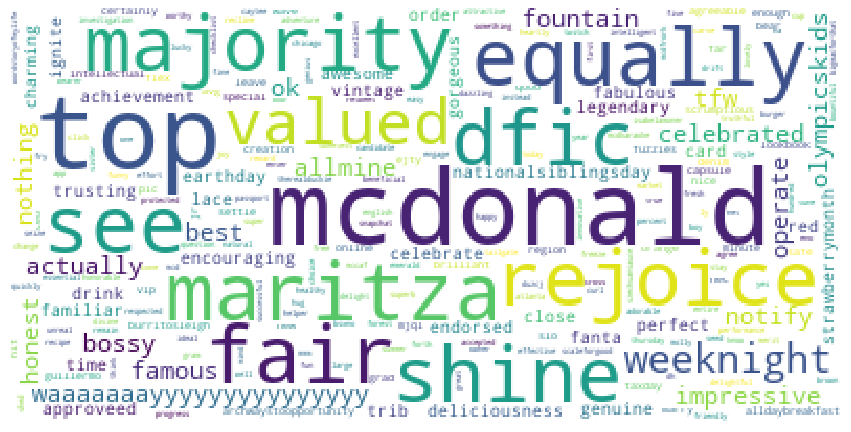

In [160]:
#=========================================create wordscloud for positive=============================================
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos_text = list(pos_w2v_list)
pos_unique_string=(" ").join(pos_w2v_list)
pos_wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(pos_unique_string)
plt.figure(figsize=(15,8))
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.show()
plt.close()

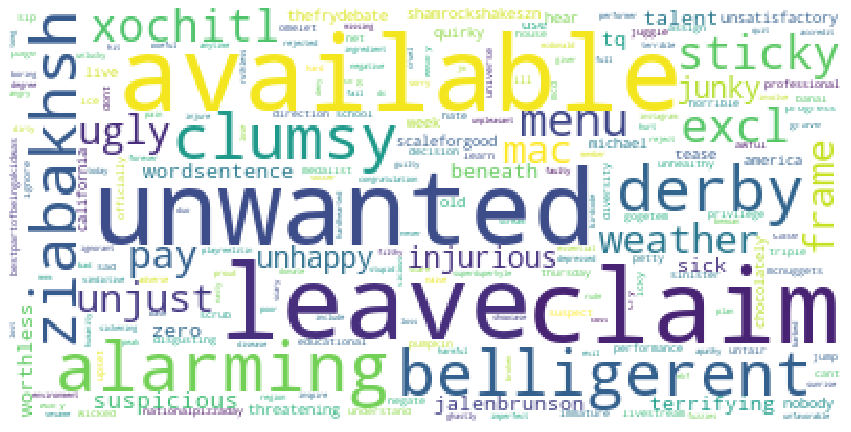

In [161]:
#=========================================create wordscloud for negative=============================================

from wordcloud import WordCloud
import matplotlib.pyplot as plt
neg_text = list(neg_w2v_list)

#convert list to string and generate
neg_unique_string=(" ").join(neg_w2v_list)
neg_wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(neg_unique_string)
plt.figure(figsize=(15,8))
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [162]:
#================================================predict labels===================================================
pos_flag=1
neg_flag=1
label=[]
def pre(text):
    check_str=[]
    global pos_flag
    global neg_flag
    wordnet=WordNetLemmatizer()
    check = re.sub('[^a-zA-Z]',' ',str(text))
    check = check.lower()
    check_all_word=[wordnet.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(check)]
    check_word = [wordnet.lemmatize(word) for word in check_all_word if not word in stopwords.words('english')]
    check_str.append(check_word)
    output = list(ngrams(check_word, 2))
    for i in range(len(output)):
        new_word=output[i][0]+"-"+output[i][1]
        check_str[0].append(new_word)

    for i in range(len(check_str)):
        pos_flag=0
        neg_flag=0
        for j in range(len(check_str[i])-1,-1,-1):
            if check_str[i][j] in pos_w2v_list:
                label.append("Positive")
                #global pos_flag
                pos_flag=2
                #print("Positive",check_str[i][j])
                break
            elif check_str[i][j] in neg_w2v_list:
                label.append("Negative")
                #global neg_flag
                neg_flag=2
                #print("Negative",check_str[i][j])
                break
        else:
            label.append("Neutral")
            pass
            
    if pos_flag==2 and neg_flag==2:
        return 'Both'
    elif pos_flag ==2:
        return "Positive"
    elif neg_flag ==2:
        return "Negative"
    else:
        return "Neutral"

In [163]:
'''#========================check for every input string==============================================
while(True):
    user_input=input("Enter your string : ")
    if user_input !='axaxa':
        print(pre(user_input))
    else:
        break
'''

'#========================check for every input string==============================================\nwhile(True):\n    user_input=input("Enter your string : ")\n    if user_input !=\'axaxa\':\n        print(pre(user_input))\n    else:\n        break\n'

In [164]:
#Filtereing datasets by removing rows with no means

In [165]:
dff['macd'][11]

'+='

In [166]:
#The data indexed at 11 has no meaning so it will be better to drop it

In [167]:
dff = dff.drop(dff.index[11])

In [168]:
#resetting index
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)
dff

,macd,pizhut
0,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
1,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
2,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
3,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
4,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
769,In a league of its own #BaconClubhouseBurger,Refuel for the big race.
770,Order your first #MmmBox. http://McD.to/mmmbox,"HERSHEY'S chocolate chunks, graham cracker cru..."
771,Be part of the @McDAAG bench mob. Follow us on...,The proof is in the pizza .
772,When bae is a Big Mac #relationshipgoals,Bringing families together since 1958. https:/...


In [169]:
dff['pizhut'][187]

'*        \n-|- \n           /\\_\n━━━━━┓\\\\\n┓┓┓┓┓┃  \\\\\n┓┓┓┓┓┃\n┓┓┓┓┓┃       \n┓┓┓┓┓┃      \n┓┓┓┓┓┃        \n┓┓┓┓┓┃\n┓┓┓┓┓┃\n┓┓┓┓┓┃'

In [170]:
#updated dataframe's data at index 187 also has no meaning so removing it

In [171]:
dff = dff.drop(dff.index[187])
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)
dff

,macd,pizhut
0,We’ve served nearly 4 Million Thank You Meals....,Get something for everyone.
1,Friends. Family. Community. WE NEED YOU! Ple...,From our Hut to yours since 1958. Order now fo...
2,Make sure your friends are doing this right......,Stay home and let us do the cooking. Get a lar...
3,It's the most magical time of the year. #Shamr...,Take a break from meal-planning for the family...
4,It's back! Post a pic of how you're celebratin...,Get our best delivery deal online now! Order a...
...,...,...
768,In a league of its own #BaconClubhouseBurger,Refuel for the big race.
769,Order your first #MmmBox. http://McD.to/mmmbox,"HERSHEY'S chocolate chunks, graham cracker cru..."
770,Be part of the @McDAAG bench mob. Follow us on...,The proof is in the pizza .
771,When bae is a Big Mac #relationshipgoals,Bringing families together since 1958. https:/...


In [173]:
dff['pizhut'][378]

'╭ ◜◝ ͡ ◜◝ ͡  ◜◝ ͡ ◜◝ ╮\n             \n╰ ◟◞ ͜  ◟ ͜   ◟◞ ͜  ◟ ͜  ╯\n          O\n             O\n〃∩\u3000 ∧＿∧\n⊂⌒（ ´・ω・）\n   ヽ_っ＿/￣￣￣/\n\u3000 \u3000   ＼/＿＿＿/'

In [174]:
dff = dff.drop(dff.index[378])
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)

In [176]:
dff['pizhut'][417]

'????'

In [177]:
dff = dff.drop(dff.index[417])
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)

In [179]:
dff = dff.drop(dff.index[429])
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)

In [181]:
dff = dff.drop(dff.index[567])
dff.reset_index(inplace=True)
dff = dff.drop(['index'], axis=1)

In [183]:
#Data filtering is done by removing some useless rows

In [184]:
#finding positive/negative/neutral tweets
for i in range(len(dff['pizhut'])):
    print(i)
    text_for=dff['pizhut'][i]
#   print(text_for)
    pre(text_for)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [185]:
#=======================creating label data for macdonalds=================================================
macd_label = []
for i in range(len(dff['macd'])):
    print(i)
    text_for=dff['macd'][i]
#    print(text_for)
    x = pre(text_for)
    macd_label.append(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [186]:
#Label data of MacDonalds
macd_label

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Pos

In [187]:
#=======================Creating Label data for Pizzahut=================================================
piz_label = []
for i in range(len(dff['pizhut'])):
    print(i)
    text_for=dff['pizhut'][i]
#    print(text_for)
    x = pre(text_for)
    piz_label.append(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [188]:
#pizzahut label data
piz_label

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Negative',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Neutral',
 'Positive',
 'Positive',
 'Neutral',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Neutral',
 'Negative',
 'Negative',
 'Neutral',
 'Neutral',
 'Neutral',
 'Positive',
 'Po

In [191]:
#creating dataframe for MacDOnalds with tweets and their definition (positive/negative/neutral)
pre_text2 = pd.DataFrame(macd_label,columns=['macd_label'])
my_df2 = pd.DataFrame(macd_label)
my_df2[0].value_counts()


new_pre_df3 = pd.DataFrame({'macd':dff['macd'][:],'label':pre_text2['macd_label'][:]})
print(new_pre_df3)

                                                  macd     label
0    We’ve served nearly 4 Million Thank You Meals....  Positive
1     Friends. Family. Community. WE NEED YOU!  Ple...  Positive
2    Make sure your friends are doing this right......  Positive
3    It's the most magical time of the year. #Shamr...  Positive
4    It's back! Post a pic of how you're celebratin...  Negative
..                                                 ...       ...
764      In a league of its own  #BaconClubhouseBurger   Neutral
765    Order your first #MmmBox. http://McD.to/mmmbox   Positive
766  Be part of the @McDAAG bench mob. Follow us on...  Positive
767          When bae is a Big Mac  #relationshipgoals  Negative
768  Show some  for Uncle Pennybags & the #MONEYMON...  Positive

[769 rows x 2 columns]


In [192]:
#creating dataframe for Pizzahut with tweets and their definition (positive/negative/neutral)

pre_text2 = pd.DataFrame(piz_label,columns=['piz_label'])
my_df2 = pd.DataFrame(piz_label)
my_df2[0].value_counts()


new_pre_df31 = pd.DataFrame({'pizhut':dff['pizhut'][:],'piz_label':pre_text2['piz_label'][:]})
print(new_pre_df31)

                                                pizhut piz_label
0                          Get something for everyone.  Positive
1    From our Hut to yours since 1958. Order now fo...  Positive
2    Stay home and let us do the cooking. Get a lar...  Positive
3    Take a break from meal-planning for the family...  Positive
4    Get our best delivery deal online now! Order a...  Negative
..                                                 ...       ...
764                           Refuel for the big race.   Neutral
765  HERSHEY'S chocolate chunks, graham cracker cru...  Positive
766                        The proof is in the pizza .   Neutral
767  Bringing families together since 1958. https:/...  Positive
768                       Pizza over flowers any day .   Neutral

[769 rows x 2 columns]


In [193]:
#Creating final dataframe

In [194]:
dfFinal = pd.DataFrame()

In [195]:
dfFinal['macd'] = new_pre_df3['macd']
dfFinal['macd_label'] = new_pre_df3['label']
dfFinal['pizhut'] = new_pre_df31['pizhut']
dfFinal['piz_label'] = new_pre_df31['piz_label']


In [196]:
dfFinal.head()

,macd,macd_label,pizhut,piz_label
0,We’ve served nearly 4 Million Thank You Meals....,Positive,Get something for everyone.,Positive
1,Friends. Family. Community. WE NEED YOU! Ple...,Positive,From our Hut to yours since 1958. Order now fo...,Positive
2,Make sure your friends are doing this right......,Positive,Stay home and let us do the cooking. Get a lar...,Positive
3,It's the most magical time of the year. #Shamr...,Positive,Take a break from meal-planning for the family...,Positive
4,It's back! Post a pic of how you're celebratin...,Negative,Get our best delivery deal online now! Order a...,Negative


In [197]:
#getting .csv dataset for final dataframe 

In [198]:
dfFinal.to_csv('finals.csv',index=False)

In [199]:
#checking no of positive, negative and neutral labels of MacDonalds
dfFinal['macd_label'].value_counts()

Positive    585
Negative    104
Neutral      80
Name: macd_label, dtype: int64

In [200]:
#checking no of positive, negative and neutral labels of MacDonalds
dfFinal['piz_label'].value_counts()

Positive    436
Neutral     244
Negative     89
Name: piz_label, dtype: int64

In [201]:
#Applying LabelEncoding on label columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfFinal['macd_label'] = le.fit_transform(dfFinal.macd_label.values)
dfFinal['piz_label'] = le.fit_transform(dfFinal.piz_label.values)
dfFinal.head()

,macd,macd_label,pizhut,piz_label
0,We’ve served nearly 4 Million Thank You Meals....,2,Get something for everyone.,2
1,Friends. Family. Community. WE NEED YOU! Ple...,2,From our Hut to yours since 1958. Order now fo...,2
2,Make sure your friends are doing this right......,2,Stay home and let us do the cooking. Get a lar...,2
3,It's the most magical time of the year. #Shamr...,2,Take a break from meal-planning for the family...,2
4,It's back! Post a pic of how you're celebratin...,0,Get our best delivery deal online now! Order a...,0


In [202]:
dfFinal['piz_label'].value_counts()

2    436
1    244
0     89
Name: piz_label, dtype: int64

In [203]:
# here 2 means positive
# 1 means negative 
# and 0 means neutral

In [204]:
import matplotlib.pyplot as plt

In [205]:
#For MacDonalds

Text(0, 0.5, 'Frequency')

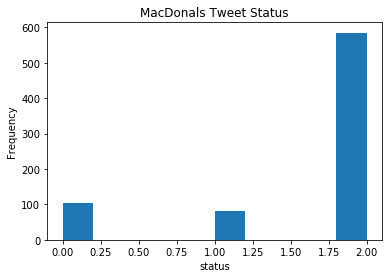

In [206]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dfFinal['macd_label'])
# set title and labels
ax.set_title('MacDonals Tweet Status')
ax.set_xlabel('status')
ax.set_ylabel('Frequency')

In [207]:
#For Pizzahut

Text(0, 0.5, 'Frequency')

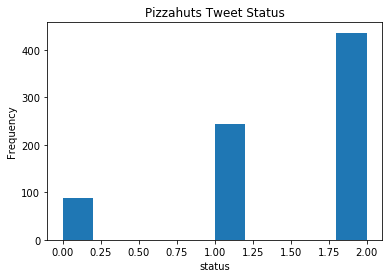

In [208]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dfFinal['piz_label'])
# set title and labels
ax.set_title('Pizzahuts Tweet Status')
ax.set_xlabel('status')
ax.set_ylabel('Frequency')

In [209]:
#So looking into analysis the Public's preception of MacDonalds is better than Pizzahut
#In MacDonalds around 80% of tweets are in positive reference and
# In pizza hut around 60% of tweets are in positive reference

AxesSubplot(0.125,0.125;0.775x0.755)


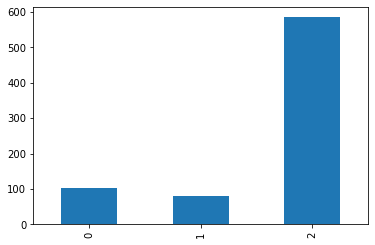

In [210]:
#For MacDonalds
print(dfFinal['macd_label'].value_counts().sort_index().plot.bar())


AxesSubplot(0.125,0.125;0.775x0.755)


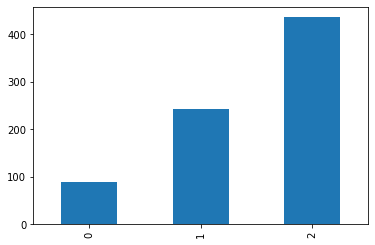

In [211]:
#For Pizzahut
print(dfFinal['piz_label'].value_counts().sort_index().plot.bar())